In [2]:
import pylab as plt
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.table import Table, join

In [3]:
import seaborn as sns

This notebook uses all the raw data from the CIGALE predictions and photoz catalogue, maps, PSF and relevant MOCs to create XID+ prior object and relevant tiling scheme

## Read in MOCs
The selection functions required are the main MOC associated with the masterlist. 

In [4]:
Sel_func=pymoc.MOC()
Sel_func.read('../../dmu4/dmu4_sm_SSDF/data/holes_SSDF_vista_ks_O16_20190207.fits')

## Read in CIGALE predictions catalogue

In [5]:
cigale=Table.read('../../dmu28/dmu28_SSDF/data/SSDF_Ldust_prediction_results.fits')

In [6]:
cigale['id'].name = 'help_id'

## Read in photoz

In [7]:
photoz=Table.read('../../dmu24/dmu24_SSDF/data/master_catalogue_ssdf_20180221_photoz_20180612_r_optimised.fits')

MemoryError: Unable to allocate array with shape (9268783,) and data type [('help_id', 'S27'), ('RA', '<f8'), ('DEC', '<f8'), ('id', '<i8'), ('z1_median', '<f8'), ('z1_min', '<f8'), ('z1_max', '<f8'), ('z1_area', '<f8'), ('z2_median', '<f8'), ('z2_min', '<f8'), ('z2_max', '<f8'), ('z2_area', '<f8'), ('za_hb', '<f8'), ('chi_r_eazy', '<f8'), ('chi_r_atlas', '<f8'), ('chi_r_cosmos', '<f8'), ('chi_r_stellar', '<f8'), ('stellar_type', 'S6')]

In [ ]:
photoz

## Join CIGALE and photoz tables

In [ ]:
prior=join(cigale,photoz)

In [ ]:
from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
f_pred=prior['bayes.dust.luminosity']/(4*np.pi*cosmo.luminosity_distance(prior['z1_median']).to(u.cm))

In [ ]:
prior=prior[np.isfinite(f_pred.value)][np.log10(f_pred.value[np.isfinite(f_pred.value)])>8.5]

In [ ]:
prior['DEC'].name='Dec'

In [13]:
len(cigale)

4436690

## Read in Maps

In [4]:
pswfits='../../dmu19/dmu19_HELP-SPIRE-maps/data/SSDF_SPIRE250_v1.0.fits'#SPIRE 250 map
pmwfits='../../dmu19/dmu19_HELP-SPIRE-maps/data/SSDF_SPIRE350_v1.0.fits'#SPIRE 350 map
plwfits='../../dmu19/dmu19_HELP-SPIRE-maps/data/SSDF_SPIRE500_v1.0.fits'#SPIRE 500 map

#output folder
output_folder='./'

In [5]:
from astropy.io import fits
from astropy import wcs

#-----250-------------
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist[1].header
im250=hdulist[1].data*1.0E3 #convert to mJy
nim250=hdulist[3].data*1.0E3 #convert to mJy
cov250 = hdulist[4].data # seconds
w_250 = wcs.WCS(hdulist[1].header)
pixsize250=3600.0*w_250.wcs.cdelt #pixel size (in arcseconds)
hdulist.close()

#-----350-------------
hdulist = fits.open(pmwfits)
im350phdu=hdulist[0].header
im350hdu=hdulist[1].header
im350=hdulist[1].data*1.0E3 #convert to mJy
nim350=hdulist[3].data*1.0E3 #convert to mJy
cov350 = hdulist[4].data # seconds
w_350 = wcs.WCS(hdulist[1].header)
pixsize350=3600.0*w_350.wcs.cdelt #pixel size (in arcseconds)
hdulist.close()

#-----500-------------
hdulist = fits.open(plwfits)
im500phdu=hdulist[0].header
im500hdu=hdulist[1].header
im500=hdulist[1].data*1.0E3 #convert to mJy
nim500=hdulist[3].data*1.0E3 #convert to mJy
cov500 = hdulist[4].data # seconds
w_500 = wcs.WCS(hdulist[1].header)
pixsize500=3600.0*w_500.wcs.cdelt #pixel size (in arcseconds)
hdulist.close()

In [46]:
import matplotlib.pyplot as plt

In [9]:
len(nim250.flatten())

60917723

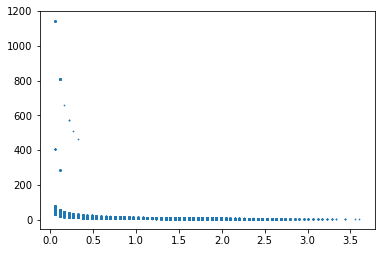

In [30]:
plt.scatter(cov250.flatten(),nim250.flatten(), s=0.05)

(0, 400)

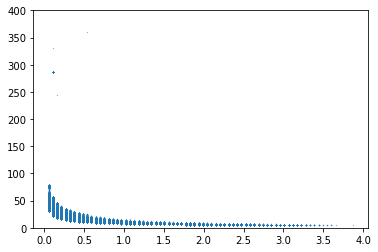

In [58]:
plt.scatter(cov250.flatten(),nim250.flatten(), s=0.05)
plt.ylim(0,400)

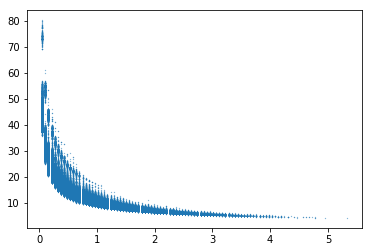

In [44]:
plt.scatter(cov350.flatten(),nim350.flatten(), s=0.05)

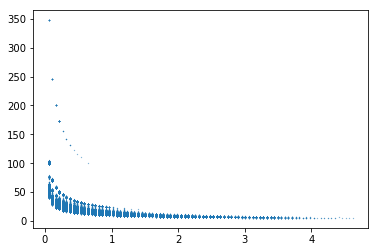

In [45]:
plt.scatter(cov500.flatten(),nim500.flatten(), s=0.05)

In [6]:
%store nim250

Stored 'nim250' (ndarray)


In [7]:
%store cov250

Stored 'cov250' (ndarray)


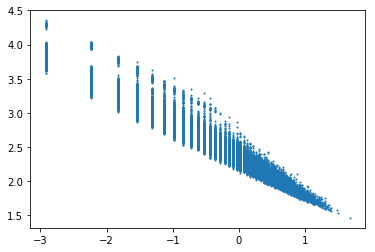

In [26]:
plt.scatter(np.log(cov350.flatten()[::10]), np.log(nim350.flatten()[::10]), s=1)


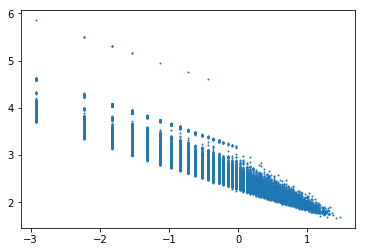

In [27]:
plt.scatter(np.log(cov500.flatten()[::10]), np.log(nim500.flatten()[::10]), s=1)


In [16]:
## Set XID+ prior class

In [17]:
#---prior250--------
prior250=xidplus.prior(im250,nim250,im250phdu,im250hdu, moc=Sel_func)#Initialise with map, uncertianty map, wcs info and primary header
prior250.prior_cat(prior['RA'] ,prior['Dec'] ,'SSDF_Ldust_prediction_results.fits',ID=prior['help_id'] )#Set input catalogue
prior250.prior_bkg(-5.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)
#---prior350--------
prior350=xidplus.prior(im350,nim350,im350phdu,im350hdu, moc=Sel_func)
prior350.prior_cat(prior['RA'] ,prior['Dec'] ,'SSDF_Ldust_prediction_results.fits',ID=prior['help_id'] )
prior350.prior_bkg(-5.0,5)

#---prior500--------
prior500=xidplus.prior(im500,nim500,im500phdu,im500hdu, moc=Sel_func)
prior500.prior_cat(prior['RA'] ,prior['Dec'] ,'SSDF_Ldust_prediction_results.fits',ID=prior['help_id'] )
prior500.prior_bkg(-5.0,5)

In [1]:
pixsize

NameError: name 'pixsize' is not defined

In [18]:
#pixsize array (size of pixels in arcseconds)
pixsize=np.array([pixsize250,pixsize350,pixsize500])
#point response function for the three bands
prfsize=np.array([18.15,25.15,36.3])
#use Gaussian2DKernel to create prf (requires stddev rather than fwhm hence pfwhm/2.355)
from astropy.convolution import Gaussian2DKernel

##---------fit using Gaussian beam-----------------------
prf250=Gaussian2DKernel(prfsize[0]/2.355,x_size=101,y_size=101)
prf250.normalize(mode='peak')
prf350=Gaussian2DKernel(prfsize[1]/2.355,x_size=101,y_size=101)
prf350.normalize(mode='peak')
prf500=Gaussian2DKernel(prfsize[2]/2.355,x_size=101,y_size=101)
prf500.normalize(mode='peak')

pind250=np.arange(0,101,1)*1.0/pixsize[0,1] #get 250 scale in terms of pixel scale of map
pind350=np.arange(0,101,1)*1.0/pixsize[1,1] #get 350 scale in terms of pixel scale of map
pind500=np.arange(0,101,1)*1.0/pixsize[2,1] #get 500 scale in terms of pixel scale of map

prior250.set_prf(prf250.array,pind250,pind250)#requires psf as 2d grid, and x and y bins for grid (in pixel scale)
prior350.set_prf(prf350.array,pind350,pind350)
prior500.set_prf(prf500.array,pind500,pind500)

In [ ]:
import pickle
#from moc, get healpix pixels at a given order
from xidplus import moc_routines
order=9
tiles=moc_routines.get_HEALPix_pixels(order,prior250.sra,prior250.sdec,unique=True)
order_large=6
tiles_large=moc_routines.get_HEALPix_pixels(order_large,prior250.sra,prior250.sdec,unique=True)
print('----- There are '+str(len(tiles))+' tiles required for input catalogue and '+str(len(tiles_large))+' large tiles')
output_folder='./'
outfile=output_folder+'Master_prior.pkl'
xidplus.io.pickle_dump({'priors':[prior250,prior350,prior500],'tiles':tiles,'order':order,'version':xidplus.io.git_version()},outfile)
outfile=output_folder+'Tiles.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'tiles':tiles,'order':order,'tiles_large':tiles_large,'order_large':order_large,'version':xidplus.io.git_version()},f)
raise SystemExit()

In [ ]:
prior250.nsrc